# Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data
df = pd.read_csv("bank_data.csv")

### Inspecting the data set

In [4]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
df.shape

(1882, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


* There are no null values in the dataset

In [7]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
num_cols = df.select_dtypes(exclude=['object','bool','datetime64[ns]']).columns
cat_cols = df.select_dtypes('object').columns

In [9]:
print("Num cols:",len(num_cols))
print("Cat cols:",len(cat_cols))


Num cols: 4
Cat cols: 2


In [10]:
# description of numerical columns
df[num_cols].describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [11]:
df.describe(include = 'object')

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


In [12]:
df['sex'].value_counts()

sex
Male      973
Female    909
Name: count, dtype: int64

In [13]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


### Exploratory data analysis

#### Analyzing the data

In [14]:
# expected_recovery_amount

In [15]:
df['expected_recovery_amount'].max()

9964

In [16]:
df['expected_recovery_amount'].min()

194

In [17]:
(df['expected_recovery_amount']>2000).sum()

965

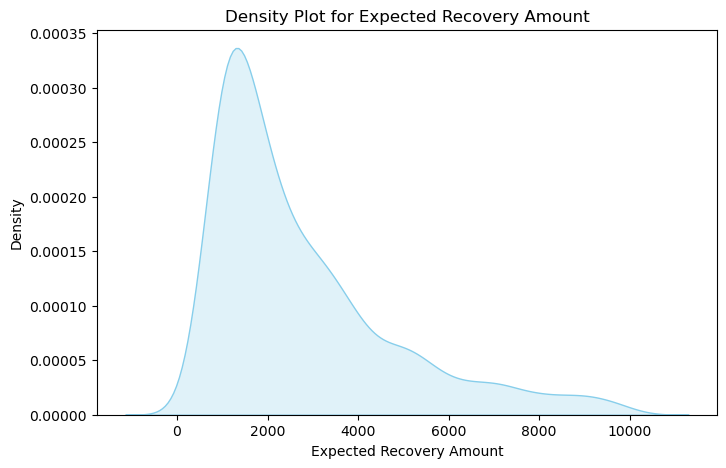

In [18]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['expected_recovery_amount'], fill=True, color='skyblue')
plt.title('Density Plot for Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Density')
plt.show()

In [19]:
#actual_recovery_amount

In [20]:
df['actual_recovery_amount'].min()

200.425

In [21]:
df['actual_recovery_amount'].max()

34398.47971

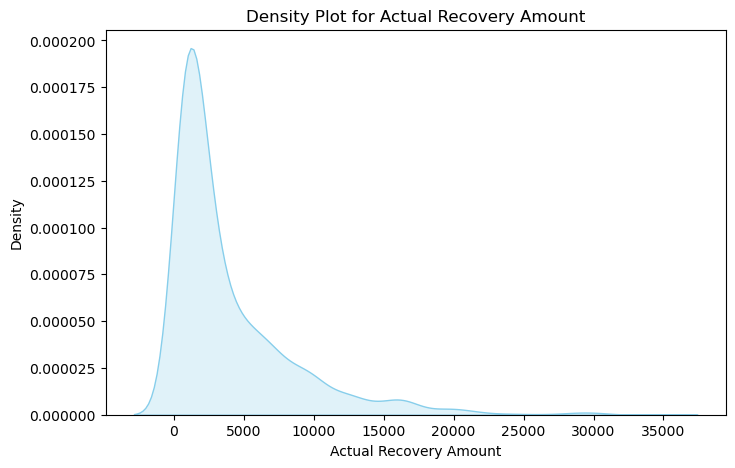

In [22]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['actual_recovery_amount'], fill=True, color='skyblue')
plt.title('Density Plot for Actual Recovery Amount')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Density')
plt.show()


In [23]:
## age

In [24]:
df['age'].max()

84

In [25]:
df['age'].min()

18

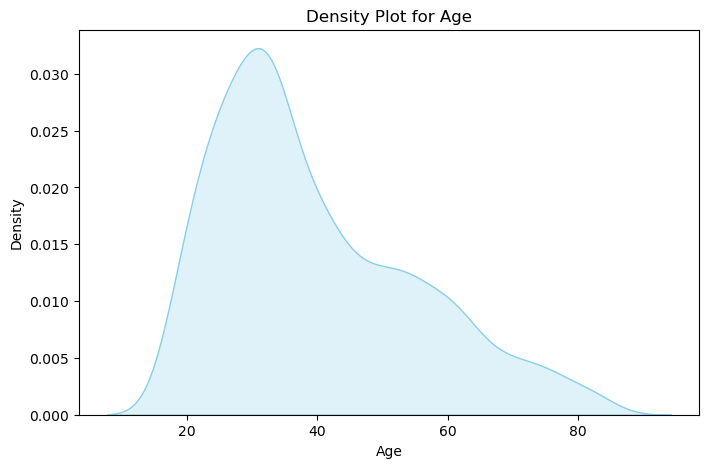

In [26]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['age'], fill=True, color='skyblue')
plt.title('Density Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

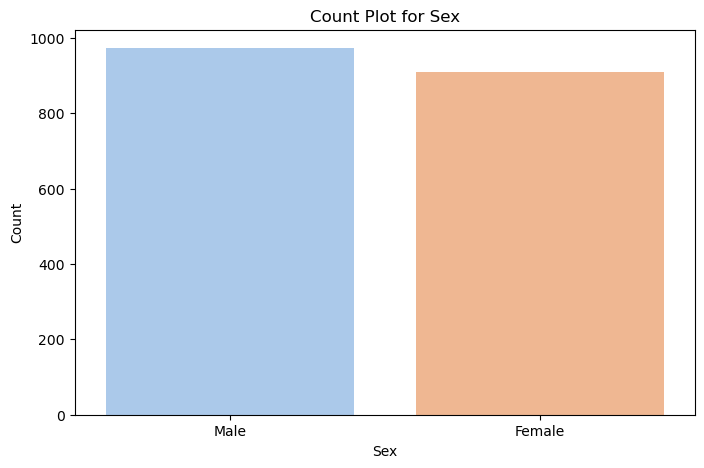

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', palette='pastel')
plt.title('Count Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

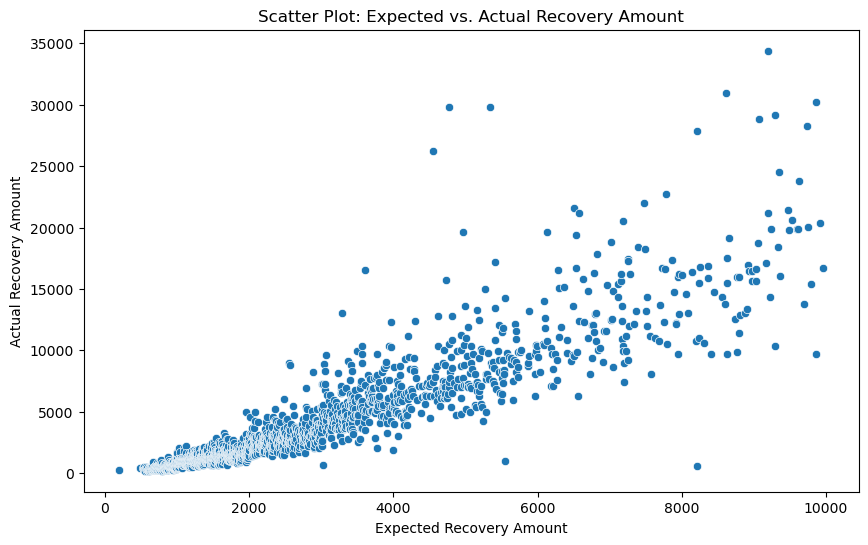

In [28]:
# Scatter plot for numerical vs. numerical
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount',data=df, palette='viridis')
plt.title('Scatter Plot: Expected vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.show()


In [29]:
# Extract numeric part from 'Level' column
df['recovery_strategy'] = df['recovery_strategy'].str.extract('(\d+)')

# Convert 'Level' column to integers
df['recovery_strategy'] = pd.to_numeric(df['recovery_strategy'], errors='coerce', downcast='integer')

# Drop rows with missing values (if any)
# df = df.dropna(subset=['recovery_strategy'])


In [30]:
# Assuming 'Gender' is the column you want to label encode
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

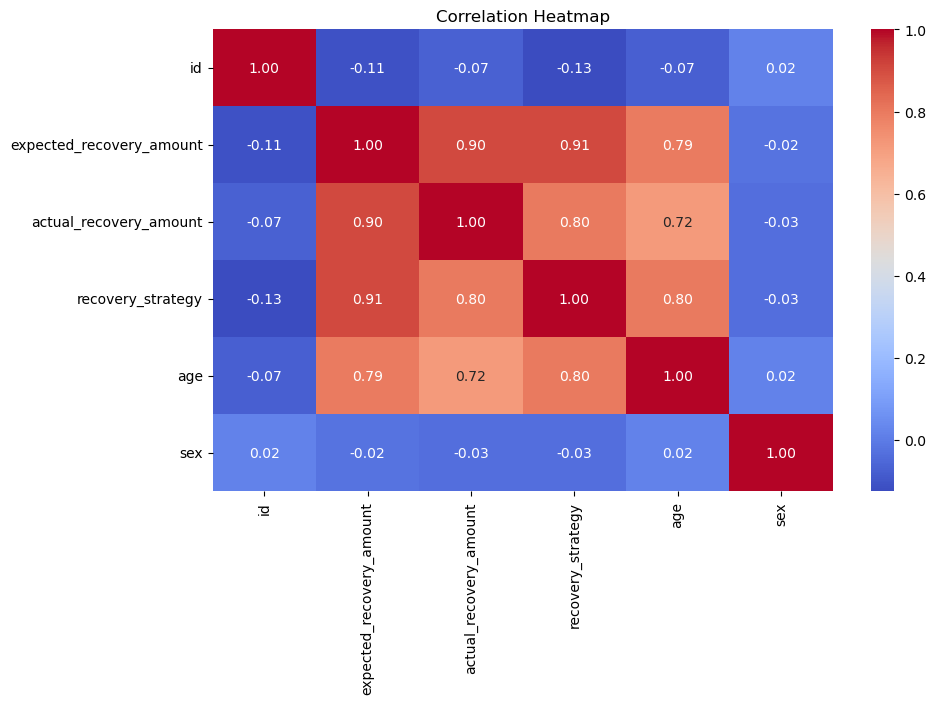

In [31]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
transition_data = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

<Axes: xlabel='expected_recovery_amount', ylabel='age'>

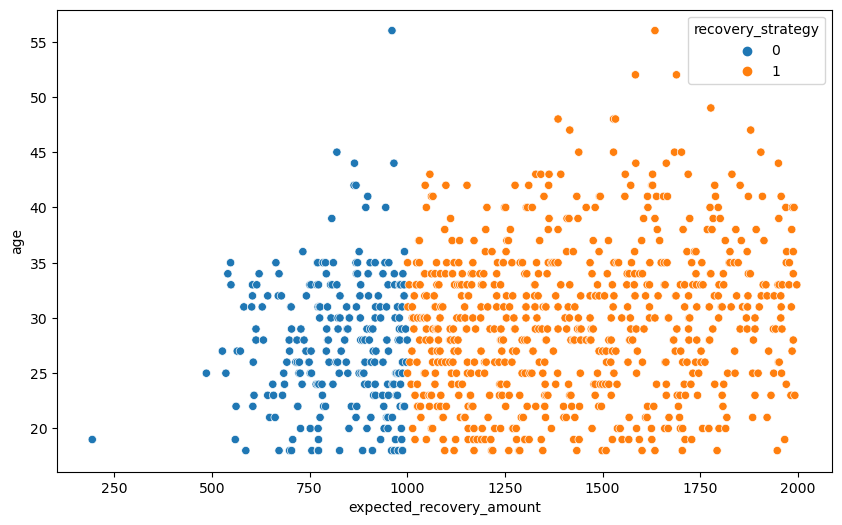

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', hue='recovery_strategy', data=transition_data)

### Statistical test - t test

In [34]:
threshold_range = (900, 1100)
above_threshold = df[df['expected_recovery_amount'] > threshold_range[0]]
above_threshold = above_threshold[above_threshold['expected_recovery_amount'] <= threshold_range[1]]

In [35]:
below_threshold = df[df['expected_recovery_amount'] <= threshold_range[1]]
below_threshold = below_threshold[below_threshold['expected_recovery_amount'] > threshold_range[0]]

In [36]:
t_stat, p_value = ttest_ind(above_threshold['age'], below_threshold['age'], equal_var=False)

In [37]:
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: 0.0
P-Value: 1.0


* As p value obtained is 1 (>0.05) there is no significant difference in the age
* Which means we accept the null hypothesis

### Statistical test for sex - Chisquare test

In [38]:
### we use chi-square test for this as we compare two categorical variables
contingency_table = pd.crosstab(df['sex'], pd.cut(df['expected_recovery_amount'], bins=[-float('inf'), 1000, float('inf')]))
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)


In [39]:
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

Chi-Square Statistic: 2.1768676619404688
P-Value: 0.14009934427173568


* As p value is > 0.05 , that means there is no significant difference in the percentage of customers that are male between the groups just above and just below the {$1000threshold

In [40]:
### Scatter plot - expected recovery amount (y) vs actual recocery amount(x)
threshold_range = (900, 1100)
data = df[(df['expected_recovery_amount'] >= threshold_range[0]) & (df['expected_recovery_amount'] <= threshold_range[1])]

<Axes: xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

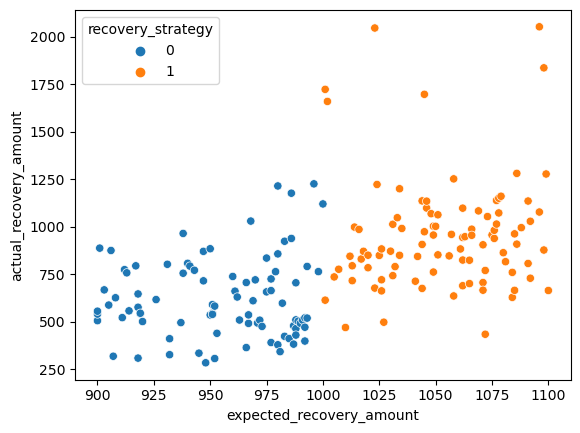

In [41]:
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=data)

In [42]:
## Kruskals test -- recovery amount
w1 = (900, 1100)
w2 = (950, 1050)

In [43]:
group_1 = df[(df['expected_recovery_amount'] >= w1[0]) & (df['expected_recovery_amount'] <= w1[1])]
group_2 = df[(df['expected_recovery_amount'] >= w2[0]) & (df['expected_recovery_amount'] <= w2[1])]

In [44]:
statistic, p_value = kruskal(group_1['actual_recovery_amount'], group_2['actual_recovery_amount'])

In [45]:
print(f'Kruskals Statistic: {statistic}')
print(f'P-Value: {p_value}')

Kruskals Statistic: 0.823820206138487
P-Value: 0.36406558976551284


* p is > 0.05 so there is no significant difference in actual recovery amount

## Regression analysis

In [46]:
X = df[['expected_recovery_amount']]
Y = df['actual_recovery_amount']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
model_no_threshold = LinearRegression()
model_no_threshold.fit(X_train, Y_train)

LinearRegression()

In [49]:
Y_pred = model_no_threshold.predict(X_test)

In [50]:
# Evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared for Model 1: {r2}')

Mean Squared Error: 4141175.5302995024
R-squared for Model 1: 0.8362344314672195


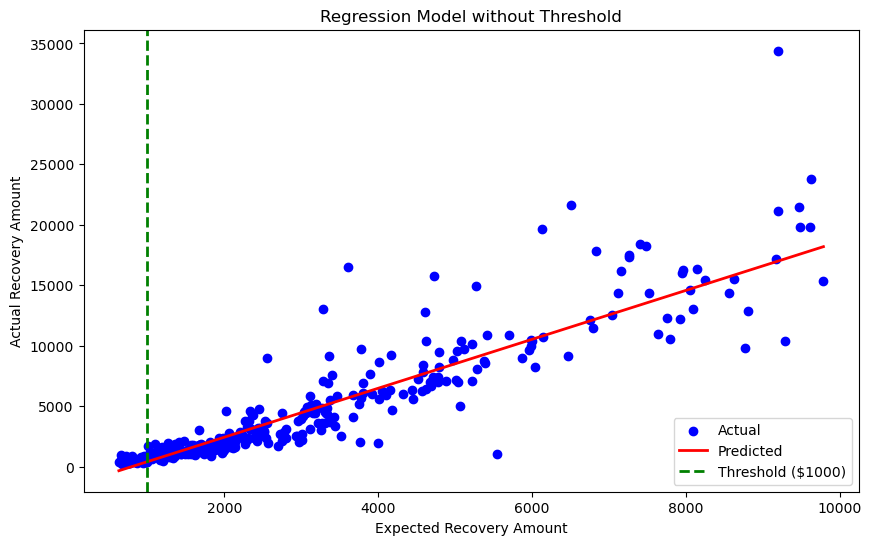

In [51]:
# Regression line plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
# Sort the data for a smoother line
sort_indices = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sort_indices], Y_pred[sort_indices], color='red', linewidth=2, label='Predicted')
plt.axvline(x=1000, color='green', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.title('Regression Model without Threshold')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()


In [52]:
# Additon of threshold
df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)
X_with_threshold = df[['expected_recovery_amount', 'above_threshold']]
Y_with_threshold = df['actual_recovery_amount']

In [53]:
X_train_with_threshold, X_test_with_threshold, Y_train_with_threshold, Y_test_with_threshold = train_test_split(
    X_with_threshold, Y_with_threshold, test_size=0.2, random_state=42)

In [54]:
model_with_threshold = LinearRegression()
model_with_threshold.fit(X_train_with_threshold, Y_train_with_threshold)


LinearRegression()

In [55]:
Y_pred_with_threshold = model_with_threshold.predict(X_test_with_threshold)

In [56]:
mse_with_threshold = mean_squared_error(Y_test_with_threshold, Y_pred_with_threshold)
r2_with_threshold = r2_score(Y_test_with_threshold, Y_pred_with_threshold)


In [57]:
print(f'R-squared (with threshold) for Model 2: {r2_with_threshold}')

R-squared (with threshold) for Model 2: 0.8380874415707112


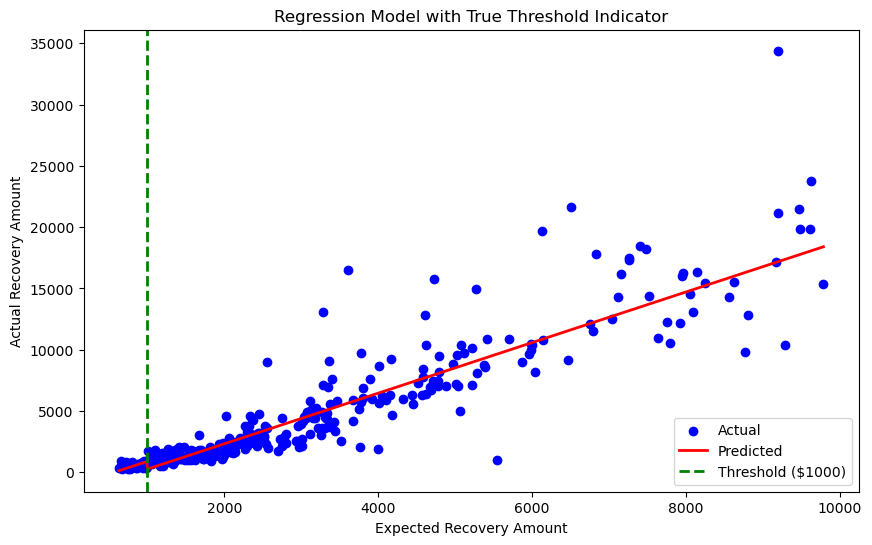

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_with_threshold['expected_recovery_amount'], Y_test_with_threshold, color='blue', label='Actual')
sort_indices_with_threshold = np.argsort(X_test_with_threshold['expected_recovery_amount'].values.flatten())
plt.plot(
    X_test_with_threshold['expected_recovery_amount'].values[sort_indices_with_threshold],
    Y_pred_with_threshold[sort_indices_with_threshold],
    color='red', linewidth=2, label='Predicted'
)
plt.axvline(x=1000, color='green', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.title('Regression Model with True Threshold Indicator')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')

plt.legend()
plt.show()

In [59]:

# Assuming you've imported the necessary libraries and loaded your DataFrame (df)

# Define the new window
new_window = (950, 1050)

# Filter data for the new window
df_new_window = df[(df['expected_recovery_amount'] >= new_window[0]) & (df['expected_recovery_amount'] <= new_window[1])]

# Create an 'above_threshold' column
df_new_window['above_threshold'] = (df_new_window['expected_recovery_amount'] > 1000).astype(int)

# Sort the DataFrame by 'expected_recovery_amount'
df_new_window = df_new_window.sort_values(by='expected_recovery_amount')

# Split the data into features (X) and target variable (Y)
X_new_window = df_new_window[['expected_recovery_amount', 'above_threshold']]
Y_new_window = df_new_window['actual_recovery_amount']

# Split the data into training and testing sets
X_train_new_window, X_test_new_window, Y_train_new_window, Y_test_new_window = train_test_split(
    X_new_window, Y_new_window, test_size=0.2, random_state=42
)

# Add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_new_window)
X_test_poly = poly.transform(X_test_new_window)

# Create and train the model with polynomial features
model_new_window = LinearRegression()
model_new_window.fit(X_train_poly, Y_train_new_window)

# Make predictions on the test set
Y_pred_new_window = model_new_window.predict(X_test_poly)

# Calculate R-squared
r2_new_window = r2_score(Y_test_new_window, Y_pred_new_window)

print(f'R-squared (new window with polynomial features) for Model 3: {r2_new_window}')


R-squared (new window with polynomial features) for Model 3: -0.0077503836148049565


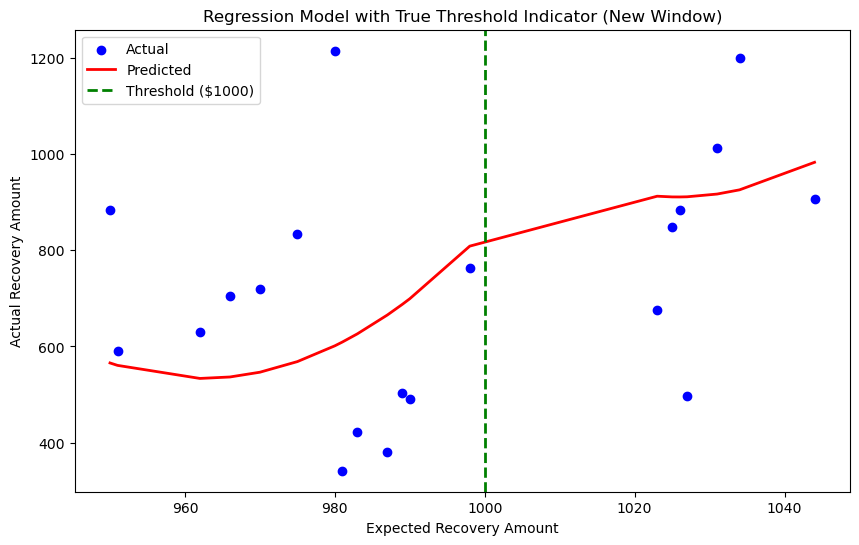

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_new_window['expected_recovery_amount'], Y_test_new_window, color='blue', label='Actual')
# Sort the data for a smoother line
sort_indices_new_window = np.argsort(X_test_new_window['expected_recovery_amount'].values.flatten())
plt.plot(
    X_test_new_window['expected_recovery_amount'].values[sort_indices_new_window],
    Y_pred_new_window[sort_indices_new_window],
    color='red', linewidth=2, label='Predicted'
)
plt.axvline(x=1000, color='green', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.title('Regression Model with True Threshold Indicator (New Window)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()

* seems to be overfitting